<a href="https://colab.research.google.com/github/Metodoscomputacionales1/Metodos1_PedroAngarita_SimonUribe/blob/main/Tarea5/Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/Datos/")
!ls

Exponencial.dat  MediaMovilData.csv  MinimosCuadratico.txt  MinimosLineal.txt


In [4]:
file = '/content/drive/MyDrive/Colab Notebooks/Datos/MinimosLineal.txt'
file

'/content/drive/MyDrive/Colab Notebooks/Datos/MinimosLineal.txt'

In [5]:
data = pd.read_csv(file)
data.head(10)

,0.000000e+00 -4.786585e+00
0,1.052632e+00 -4.065870e+00
1,2.105263e+00 1.796494e-01
2,3.157895e+00 2.719807e+00
3,4.210526e+00 2.878523e+00
4,5.263158e+00 4.527426e+00
5,6.315789e+00 8.827734e+00
6,7.368421e+00 1.097722e+01
7,8.421053e+00 1.179944e+01
8,9.473684e+00 1.452931e+01
9,1.052632e+01 1.722463e+01


In [6]:
data = pd.read_csv(file,sep=' ')
data.columns = ['x','y']
data

,x,y
0,1.052632,-4.065870
1,2.105263,0.179649
2,3.157895,2.719807
3,4.210526,2.878523
4,5.263158,4.527426
5,6.315789,8.827734
6,7.368421,10.977220
7,8.421053,11.799440
8,9.473684,14.529310
9,10.526320,17.224630


In [7]:
x = np.array(data['x'])
y = np.array(data['y'])

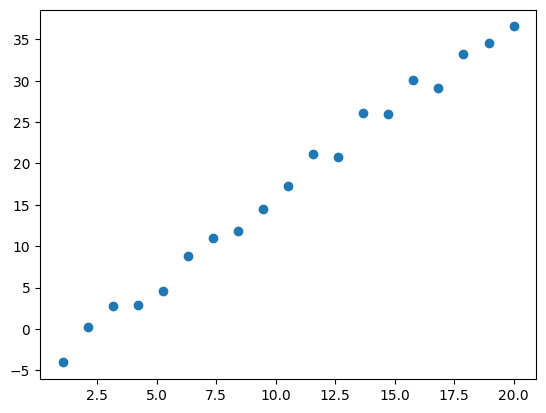

In [8]:
plt.scatter(x,y)

In [9]:
def GetFit(x,y,n):
  l=x.shape[0]
  b=y
  A=np.ones((l,n+1))
  for i in range(1,n+1):
    A[:,i]=x**i
    #Esto hace que cada columan sea el grado de x
  AT=np.dot(A.T,A)
  bT=np.dot(A.T,b)
  xsol=np.linalg.solve(AT,bT)

  return xsol

#primera columna 1s, la segunda xs, la tercesa seria x**2 y asi sucesivamente
sol=GetFit(x,y,1)
sol

array([-5.20732249,  2.13074682])

In [10]:
def GetModel(x,p):
  y=0.
  for n in range(len(p)):
    y+=p[n]*x**n
  return y

In [15]:
import sympy as sym
X=sym.Symbol('x')
ecu=GetModel(X,sol)
ecu

2.13074681641327*x - 5.20732249057208

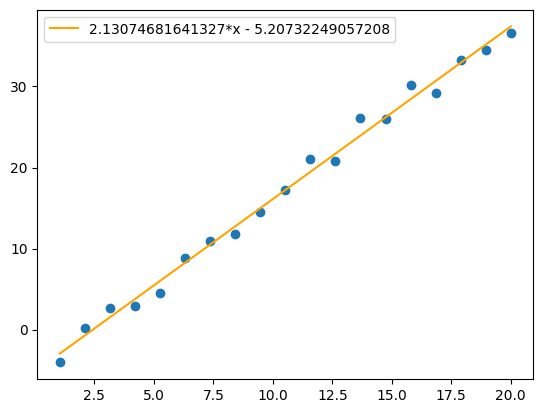

In [24]:
xi=np.linspace(np.min(x),np.max(x),50)
yi=GetModel(xi,sol)
plt.scatter(x,y)
plt.plot(xi,yi, color='orange', label=ecu)
plt.legend()